# Project 01: Linear Regression Model

### Name: Tanusree Debi,Id: 1001838957

### 1.Training a model via linear regression:

#### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Import the Iris dataset

In [2]:
data_set= pd.read_csv('iris.csv')

#### Visualize the dataset

In [3]:
data_set

,Sepal length,Sepal width,Petal length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
data_set.head()

,Sepal length,Sepal width,Petal length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data_set.tail()

,Sepal length,Sepal width,Petal length,Petal Width,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
data_set.shape

(150, 5)

#### Shuffle the dataset for better output

In [7]:
data_shuffle= data_set.sample(frac = 1)

#### Visualize the shuffle dataset

In [8]:
data_shuffle

,Sepal length,Sepal width,Petal length,Petal Width,Species
30,4.8,3.1,1.6,0.2,Iris-setosa
147,6.5,3.0,5.2,2.0,Iris-virginica
70,5.9,3.2,4.8,1.8,Iris-versicolor
116,6.5,3.0,5.5,1.8,Iris-virginica
56,6.3,3.3,4.7,1.6,Iris-versicolor
...,...,...,...,...,...
16,5.4,3.9,1.3,0.4,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
66,5.6,3.0,4.5,1.5,Iris-versicolor
37,4.9,3.1,1.5,0.1,Iris-setosa


#### Convert the categorical features into numerical features

In [9]:
data_shuffle = data_shuffle.replace({'Species' : { 'Iris-setosa' : 1, 'Iris-versicolor' : 2, 'Iris-virginica' : 3 }})

#### Divide the Iris dataset features into the input dataset (x=Features) and target dataset (y=Species)

In [10]:
incols = ['Sepal length', 'Sepal width', 'Petal length', 'Petal Width']
outcols = ['Species']
x= data_shuffle[incols]
y= data_shuffle[outcols]

In [11]:
X=x.to_numpy()
Y=y.to_numpy()

#### Spliting the input and target dataset into train (80%) and test dataset(20%) ( Without use of cross validation)

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X, Y, test_size=0.2, random_state=0)

#### Add bias value into  x_train and x_test

In [13]:
x_train=np.vstack((np.ones((x_train.shape[0], )),x_train.T)).T
x_test=np.vstack((np.ones((x_test.shape[0], )),x_test.T)).T

#### Build the model using linear regression equations:

In [14]:
def model(x_train,y_train,learning_rate,iteration):
    m=y_train.size
    theta=np.zeros((x_train.shape[1],1))
    cost_list=[]
    
    for i in range(iteration):
        y_pred= np.dot(x_train,theta)
        
        cost=(1/2*m)*np.sum(np.square(y_pred-y_train))
        
        d_theta=(1/m)*np.dot(x_train.T,y_pred-y_train)
        
        theta= theta-d_theta*learning_rate
        cost_list.append(cost)
        
        if(i%(iteration/1000)==0):
            print("Cost is:",cost);
    return theta, cost_list

#### Train the model on training dataset

In [15]:
theta,cost_list=model(x_train, y_train,learning_rate=0.00005,iteration=30000)

Cost is: 33000.0
Cost is: 27661.748575377584
Cost is: 23231.697624065855
Cost is: 19555.124831925066
Cost is: 16503.667933901328
Cost is: 13970.833742487051
Cost is: 11868.272304756865
Cost is: 10122.685832724419
Cost is: 8673.26426044114
Cost is: 7469.557706232919
Cost is: 6469.7114043755555
Cost is: 5639.001352148941
Cost is: 4948.619439273255
Cost is: 4374.665555316265
Cost is: 3897.3114121537837
Cost is: 3500.1068263225607
Cost is: 3169.404190318065
Cost is: 2893.88099694035
Cost is: 2664.1437113518878
Cost is: 2472.3991316058905
Cost is: 2312.1817396080182
Cost is: 2178.127503399417
Cost is: 2065.7862168313777
Cost is: 1971.465811001087
Cost is: 1892.1031904070774
Cost is: 1825.1570747975097
Cost is: 1768.5190975927983
Cost is: 1720.440050502886
Cost is: 1679.4686938760838
Cost is: 1644.4009919508658
Cost is: 1614.237996915854
Cost is: 1588.1509082771577
Cost is: 1565.4520850731815
Cost is: 1545.5709967479293
Cost is: 1528.0342712816607
Cost is: 1512.4491425275685
Cost is: 1498.48

Cost is: 643.480243114145
Cost is: 642.4763823644562
Cost is: 641.4788430779554
Cost is: 640.4875848996243
Cost is: 639.5025677321827
Cost is: 638.5237517344463
Cost is: 637.5510973196888
Cost is: 636.5845651540186
Cost is: 635.6241161547622
Cost is: 634.6697114888605
Cost is: 633.7213125712743
Cost is: 632.7788810634
Cost is: 631.8423788714975
Cost is: 630.9117681451224
Cost is: 629.9870112755759
Cost is: 629.0680708943585
Cost is: 628.1549098716381
Cost is: 627.2474913147223
Cost is: 626.345778566546
Cost is: 625.4497352041678
Cost is: 624.5593250372715
Cost is: 623.6745121066813
Cost is: 622.7952606828874
Cost is: 621.921535264577
Cost is: 621.0533005771782
Cost is: 620.1905215714114
Cost is: 619.3331634218488
Cost is: 618.4811915254872
Cost is: 617.6345715003258
Cost is: 616.7932691839555
Cost is: 615.9572506321563
Cost is: 615.1264821175017
Cost is: 614.3009301279774
Cost is: 613.4805613656043
Cost is: 612.6653427450693
Cost is: 611.8552413923696
Cost is: 611.050224643462
Cost is:

Cost is: 498.1894028311222
Cost is: 498.08171814379466
Cost is: 497.97463805270405
Cost is: 497.8681587144411
Cost is: 497.7622763101394
Cost is: 497.6569870453192
Cost is: 497.5522871497313
Cost is: 497.4481728772022
Cost is: 497.34464050548036
Cost is: 497.24168633608383
Cost is: 497.1393066941479
Cost is: 497.0374979282742
Cost is: 496.9362564103819
Cost is: 496.83557853555715
Cost is: 496.73546072190675
Cost is: 496.6358994104093
Cost is: 496.5368910647707
Cost is: 496.43843217127926
Cost is: 496.34051923865894
Cost is: 496.2431487979291
Cost is: 496.1463174022602
Cost is: 496.0500216268328
Cost is: 495.95425806869764
Cost is: 495.85902334663444
Cost is: 495.7643141010151
Cost is: 495.670126993664
Cost is: 495.57645870772217
Cost is: 495.48330594751013
Cost is: 495.390665438394
Cost is: 495.2985339266497
Cost is: 495.20690817933036
Cost is: 495.1157849841329
Cost is: 495.0251611492665
Cost is: 494.9350335033219
Cost is: 494.8453988951411
Cost is: 494.75625419368714
Cost is: 494.667

#### Plot the Effect of Learning Rate On Convergence of Gradient Descent

Text(0.5, 1.0, 'Effect of Learning Rate On Convergence of Gradient Descent')

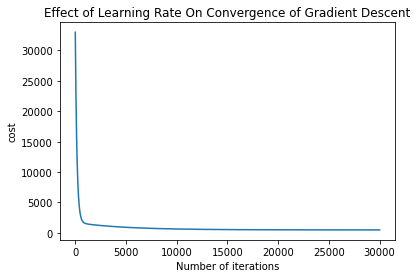

In [16]:
plt.plot(cost_list)
plt.xlabel("Number of iterations")
plt.ylabel("cost")
plt.title("Effect of Learning Rate On Convergence of Gradient Descent")

#### Cost value on different Learning Rate On Convergence of Gradient Descent

In [17]:
iteration = 10000;
print("Cost for learning rate=0.00005")
learning_rate = 0.00005;
theta_1, cost_history_1 = model(x_train, y_train,learning_rate,iteration)
print("Cost for learning rate=0.0000001")
learning_rate = 0.0002;
theta_2, cost_history_2 = model(x_train, y_train,learning_rate,iteration)
print("Cost for learning rate=0.000002")
learning_rate = 0.0003;
theta_3, cost_history_3 = model(x_train, y_train,learning_rate,iteration)
print("Cost for learning rate=0.000003")
learning_rate = 0.0004;
theta_4, cost_history_4 = model(x_train, y_train,learning_rate,iteration)
print("Cost for learning rate=0.000004")
learning_rate = 0.0025;
theta_5, cost_history_5 = model(x_train, y_train,learning_rate,iteration)

Cost for learning rate=0.00005
Cost is: 33000.0
Cost is: 31108.879781352603
Cost is: 29331.756150158646
Cost is: 27661.748575377584
Cost is: 26092.391835350158
Cost is: 24617.610949652142
Cost is: 23231.697624065855
Cost is: 21929.28811733731
Cost is: 20705.342443899848
Cost is: 19555.124831925066
Cost is: 18474.185360929194
Cost is: 17458.342707736825
Cost is: 16503.667933901328
Cost is: 15606.469251719425
Cost is: 14763.277709771808
Cost is: 13970.833742487051
Cost is: 13226.074531576272
Cost is: 12526.122130333733
Cost is: 11868.272304756865
Cost is: 11249.984048218172
Cost is: 10668.869729033433
Cost is: 10122.685832724419
Cost is: 9609.324263080267
Cost is: 9126.804168288312
Cost is: 8673.26426044114
Cost is: 8246.955598639495
Cost is: 7846.234807708438
Cost is: 7469.557706232919
Cost is: 7115.4733192063095
Cost is: 6782.6182520765
Cost is: 6469.7114043755555
Cost is: 6175.549002435639
Cost is: 5898.999931931065
Cost is: 5639.001352148941
Cost is: 5394.5545749832
Cost is: 5164.721

Cost is: 769.2205477247858
Cost is: 768.6197507644117
Cost is: 768.0202253789462
Cost is: 767.4219688561966
Cost is: 766.8249784897565
Cost is: 766.2292515789945
Cost is: 765.6347854290406
Cost is: 765.0415773507735
Cost is: 764.4496246608104
Cost is: 763.8589246814927
Cost is: 763.2694747408746
Cost is: 762.6812721727117
Cost is: 762.0943143164477
Cost is: 761.5085985172026
Cost is: 760.9241221257596
Cost is: 760.340882498556
Cost is: 759.7588769976674
Cost is: 759.1781029907988
Cost is: 758.5985578512697
Cost is: 758.0202389580058
Cost is: 757.4431436955223
Cost is: 756.8672694539167
Cost is: 756.2926136288539
Cost is: 755.7191736215548
Cost is: 755.1469468387853
Cost is: 754.5759306928445
Cost is: 754.006122601551
Cost is: 753.4375199882338
Cost is: 752.8701202817186
Cost is: 752.3039209163172
Cost is: 751.7389193318145
Cost is: 751.1751129734585
Cost is: 750.6124992919474
Cost is: 750.0510757434179
Cost is: 749.4908397894351
Cost is: 748.931788896979
Cost is: 748.373920538435
Cost 

Cost is: 562.1819607095782
Cost is: 561.523014670055
Cost is: 560.8695188988665
Cost is: 560.2214270696934
Cost is: 559.5786932503554
Cost is: 558.9412718994577
Cost is: 558.3091178630665
Cost is: 557.6821863714117
Cost is: 557.060433035619
Cost is: 556.4438138444698
Cost is: 555.8322851611855
Cost is: 555.225803720245
Cost is: 554.624326624224
Cost is: 554.0278113406632
Cost is: 553.436215698963
Cost is: 552.8494978873063
Cost is: 552.2676164496031
Cost is: 551.6905302824678
Cost is: 551.1181986322139
Cost is: 550.550581091882
Cost is: 549.9876375982885
Cost is: 549.4293284291008
Cost is: 548.8756141999365
Cost is: 548.3264558614906
Cost is: 547.7818146966808
Cost is: 547.2416523178244
Cost is: 546.7059306638332
Cost is: 546.1746119974367
Cost is: 545.6476589024254
Cost is: 545.1250342809202
Cost is: 544.6067013506631
Cost is: 544.0926236423329
Cost is: 543.5827649968818
Cost is: 543.0770895628958
Cost is: 542.5755617939776
Cost is: 542.0781464461509
Cost is: 541.5848085752878
Cost is

Cost is: 476.69355411146756
Cost is: 476.67424113684586
Cost is: 476.65496163664415
Cost is: 476.6357153632692
Cost is: 476.61650207122193
Cost is: 476.5973215170799
Cost is: 476.5781734594785
Cost is: 476.5590576590947
Cost is: 476.53997387862955
Cost is: 476.52092188278976
Cost is: 476.50190143827183
Cost is: 476.4829123137451
Cost is: 476.463954279834
Cost is: 476.4450271091024
Cost is: 476.4261305760371
Cost is: 476.4072644570304
Cost is: 476.38842853036516
Cost is: 476.36962257619825
Cost is: 476.3508463765439
Cost is: 476.33209971525946
Cost is: 476.3133823780281
Cost is: 476.29469415234416
Cost is: 476.2760348274981
Cost is: 476.25740419455997
Cost is: 476.2388020463653
Cost is: 476.22022817749985
Cost is: 476.20168238428454
Cost is: 476.1831644647613
Cost is: 476.16467421867713
Cost is: 476.1462114474705
Cost is: 476.1277759542579
Cost is: 476.1093675438176
Cost is: 476.0909860225764
Cost is: 476.0726311985962
Cost is: 476.0543028815589
Cost is: 476.0360008827545
Cost is: 476.0

Cost is: 475.82706360669863
Cost is: 475.8000927799454
Cost is: 475.7731755581725
Cost is: 475.74631138201073
Cost is: 475.7194996991513
Cost is: 475.69273996425886
Cost is: 475.6660316388813
Cost is: 475.63937419136204
Cost is: 475.6127670967539
Cost is: 475.5862098367339
Cost is: 475.5597018995186
Cost is: 475.53324277978055
Cost is: 475.5068319785666
Cost is: 475.4804690032166
Cost is: 475.45415336728325
Cost is: 475.4278845904528
Cost is: 475.40166219846765
Cost is: 475.37548572304803
Cost is: 475.3493547018177
Cost is: 475.32326867822604
Cost is: 475.29722720147697
Cost is: 475.2712298264541
Cost is: 475.2452761136483
Cost is: 475.21936562908644
Cost is: 475.19349794426125
Cost is: 475.16767263606215
Cost is: 475.14188928670495
Cost is: 475.11614748366577
Cost is: 475.09044681961313
Cost is: 475.06478689234194
Cost is: 475.03916730470894
Cost is: 475.013587664567
Cost is: 474.9880475847029
Cost is: 474.9625466827731
Cost is: 474.9370845812431
Cost is: 474.9116609073253
Cost is: 47

Cost is: 508.38481474473906
Cost is: 507.94295279552335
Cost is: 507.5079811871527
Cost is: 507.07978349292625
Cost is: 506.6582452590659
Cost is: 506.24325397128024
Cost is: 505.834699021895
Cost is: 505.4324716775394
Cost is: 505.03646504738276
Cost is: 504.64657405190815
Cost is: 504.2626953922125
Cost is: 503.88472751983306
Cost is: 503.51257060707917
Cost is: 503.1461265178705
Cost is: 502.7852987790681
Cost is: 502.42999255229154
Cost is: 502.08011460621384
Cost is: 501.7355732893268
Cost is: 501.39627850316475
Cost is: 501.0621416759868
Cost is: 500.7330757369009
Cost is: 500.4089950904287
Cost is: 500.089815591501
Cost is: 499.7754545208773
Cost is: 499.46583056098007
Cost is: 499.1608637721421
Cost is: 498.8604755692524
Cost is: 498.5645886988017
Cost is: 498.27312721631296
Cost is: 497.98601646415824
Cost is: 497.7031830497493
Cost is: 497.42455482409804
Cost is: 497.1500608607407
Cost is: 496.8796314350194
Cost is: 496.61319800371393
Cost is: 496.3506931850201
Cost is: 496.0

Cost is: 464.00219198029333
Cost is: 463.97724257318737
Cost is: 463.9523068283028
Cost is: 463.9273847354192
Cost is: 463.9024762843419
Cost is: 463.8775814649008
Cost is: 463.852700266951
Cost is: 463.8278326803726
Cost is: 463.8029786950688
Cost is: 463.77813830096784
Cost is: 463.7533114880208
Cost is: 463.7284982462029
Cost is: 463.70369856551116
Cost is: 463.67891243596614
Cost is: 463.6541398476108
Cost is: 463.62938079050974
Cost is: 463.60463525475046
Cost is: 463.5799032304412
Cost is: 463.55518470771136
Cost is: 463.5304796767121
Cost is: 463.50578812761535
Cost is: 463.4811100506134
Cost is: 463.45644543591845
Cost is: 463.43179427376367
Cost is: 463.4071565544016
Cost is: 463.3825322681041
Cost is: 463.35792140516315
Cost is: 463.3333239558889
Cost is: 463.3087399106114
Cost is: 463.2841692596788
Cost is: 463.2596119934579
Cost is: 463.23506810233386
Cost is: 463.21053757670984
Cost is: 463.1860204070068
Cost is: 463.16151658366346
Cost is: 463.1370260971355
Cost is: 463.1

Cost is: 427.51141638236606
Cost is: 427.4609302509176
Cost is: 427.4105473666443
Cost is: 427.36026734353186
Cost is: 427.31008979719047
Cost is: 427.26001434484755
Cost is: 427.21004060534017
Cost is: 427.1601681991091
Cost is: 427.11039674819057
Cost is: 427.060725876211
Cost is: 427.01115520837874
Cost is: 426.96168437147855
Cost is: 426.91231299386357
Cost is: 426.8630407054495
Cost is: 426.8138671377077
Cost is: 426.76479192365764
Cost is: 426.7158146978618
Cost is: 426.66693509641794
Cost is: 426.6181527569525
Cost is: 426.56946731861456
Cost is: 426.52087842206896
Cost is: 426.47238570948986
Cost is: 426.42398882455427
Cost is: 426.3756874124353
Cost is: 426.32748111979646
Cost is: 426.2793695947844
Cost is: 426.2313524870231
Cost is: 426.1834294476072
Cost is: 426.13560012909585
Cost is: 426.0878641855067
Cost is: 426.040221272309
Cost is: 425.9926710464174
Cost is: 425.9452131661867
Cost is: 425.89784729140456
Cost is: 425.85057308328584
Cost is: 425.80339020446627
Cost is: 4

#### Effect of Different Learning Rate On Convergence of Gradient Descent

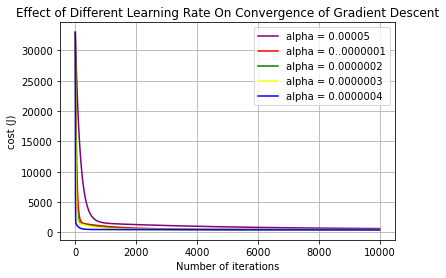

In [18]:
plt.plot(range(1, iteration +1), cost_history_1, color ='purple', label = 'alpha = 0.00005')
plt.plot(range(1, iteration +1), cost_history_2, color ='red', label = 'alpha = 0..0000001')
plt.plot(range(1, iteration +1), cost_history_3, color ='green', label = 'alpha = 0.0000002')
plt.plot(range(1, iteration +1), cost_history_4, color ='yellow', label = 'alpha = 0.0000003')
plt.plot(range(1, iteration +1), cost_history_5, color ='blue', label = 'alpha = 0.0000004')

plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("cost (J)")
plt.title("Effect of Different Learning Rate On Convergence of Gradient Descent")
plt.legend()

#### Calculate the accuracy: 

In [19]:
y_prediction= np.dot(x_test,theta)
error= (1/(x_test.shape[0]))*np.sum(np.abs(y_prediction-y_test))
Accuracy=(1-error)*100

In [20]:
Accuracy

80.29330663250965

#### Plot Actual vs. Predicted value without k-fold

Text(0.5, 1.0, 'Actual vs. Predicted without k-fold')

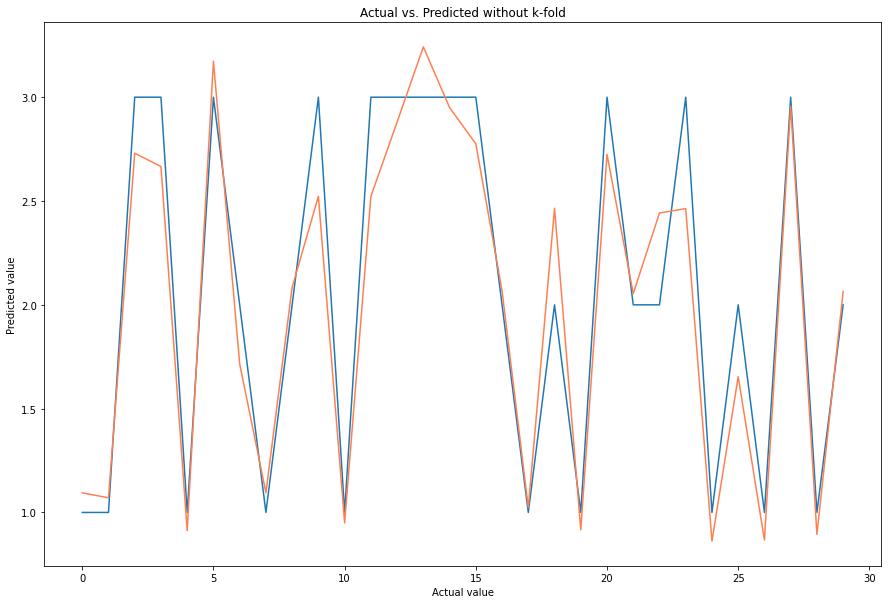

In [21]:
plt.figure(figsize=(15,10))
x=np.arange(0,30,1)
plt.plot(x,y_test)
plt.plot(x,y_prediction,c='coral')
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.title('Actual vs. Predicted without k-fold')

### 2. Using the trained model to do the classification:

In [22]:
y_prediction

array([[1.09441596],
       [1.07058341],
       [2.73046834],
       [2.66599741],
       [0.91240848],
       [3.17327793],
       [1.71537086],
       [1.09509898],
       [2.08435066],
       [2.52274904],
       [0.94947126],
       [2.52190423],
       [2.88034209],
       [3.24219055],
       [2.9500903 ],
       [2.77554841],
       [2.06751757],
       [1.02279242],
       [2.46492013],
       [0.916134  ],
       [2.72468373],
       [2.05390865],
       [2.44211349],
       [2.46355004],
       [0.86203522],
       [1.65412674],
       [0.86714271],
       [2.95672296],
       [0.89469939],
       [2.06428347]])

### Convert the predicted continuous value into discrete value using threshold:

In [23]:
for i in range (y_test.size):
    if (y_prediction[i]<=1.5):
        y_prediction[i]=1.0
    elif((y_prediction[i])>1.5 and (y_prediction[i]<=2.5)):
        y_prediction[i]=2.0
    else:
        y_prediction[i]=3.0

In [24]:
y_prediction

array([[1.],
       [1.],
       [3.],
       [3.],
       [1.],
       [3.],
       [2.],
       [1.],
       [2.],
       [3.],
       [1.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [2.],
       [1.],
       [2.],
       [1.],
       [3.],
       [2.],
       [2.],
       [2.],
       [1.],
       [2.],
       [1.],
       [3.],
       [1.],
       [2.]])

#### show the accuracy that how the model can classify the features

In [25]:
num_true=y_prediction-y_test
n_zeros = np.count_nonzero(num_true==0)
accuracy=(n_zeros/y_test.size)*100

In [26]:
accuracy

96.66666666666667

#### Plot the Actual vs. Predicted discrete value for classification 

Text(0.5, 1.0, 'Actual vs. Predicted')

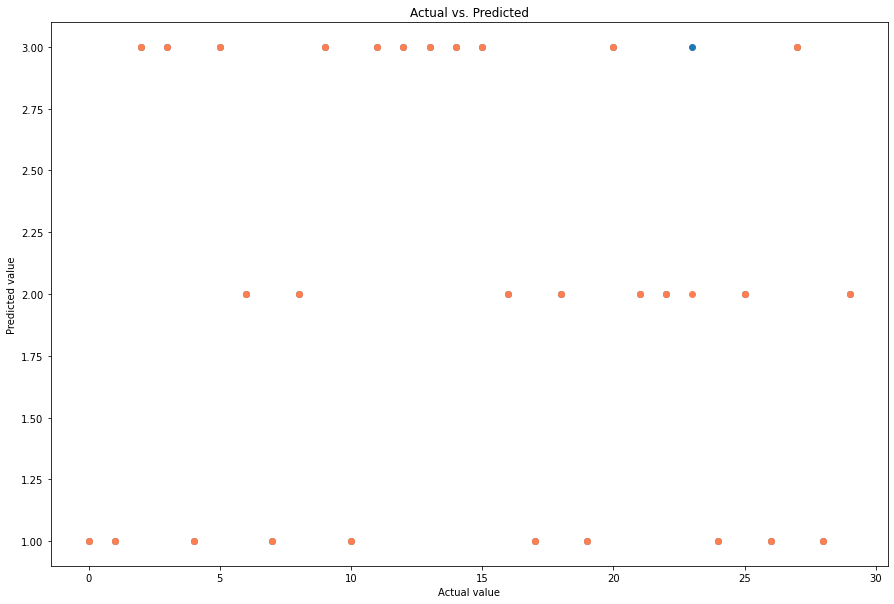

In [27]:
plt.figure(figsize=(15,10))
x=np.arange(0,30,1)
plt.scatter(x,y_test)
plt.scatter(x,y_prediction,c='coral')
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.title('Actual vs. Predicted')

### 3. Training a model via linear regression using cross-validation:

In [28]:
data_shuffle

,Sepal length,Sepal width,Petal length,Petal Width,Species
30,4.8,3.1,1.6,0.2,1
147,6.5,3.0,5.2,2.0,3
70,5.9,3.2,4.8,1.8,2
116,6.5,3.0,5.5,1.8,3
56,6.3,3.3,4.7,1.6,2
...,...,...,...,...,...
16,5.4,3.9,1.3,0.4,1
8,4.4,2.9,1.4,0.2,1
66,5.6,3.0,4.5,1.5,2
37,4.9,3.1,1.5,0.1,1


#### Using Kfold for cross validation

In [29]:
from sklearn.model_selection import KFold 
kf = KFold(n_splits=5)  
kf.get_n_splits(X) 
print(kf) 
KFold(n_splits=5, random_state=None, shuffle=False)

KFold(n_splits=5, random_state=None, shuffle=False)


KFold(n_splits=5, random_state=None, shuffle=False)

#### Call the model function from previous LR model (without cross validation) and evaluate with K fold cross validation:

In [30]:
theta_final=[]
cost_list_final=[]
scorefinal=[]
totalaccuracy=[]

for train_index, test_index in kf.split(X):
    
    traininput=X[train_index]
    
    x_train=np.vstack((np.ones((traininput.shape[0], )),traininput.T)).T
    y_train=Y[train_index]
    
    testinput=X[test_index]
    
    
    x_test=np.vstack((np.ones((testinput.shape[0], )),testinput.T)).T
    y_test=Y[test_index]


    print("The shape of x_train:",x_train.shape)
    print("The shape of x_test:",x_test.shape)
    print("The shape of y_train:",y_train.shape)
    print("The shape of y_test:",y_test.shape)
   
    #call the model function 
    theta,cost_list=model(x_train, y_train,learning_rate=0.00005,iteration=30000)
    
    theta_final.append(theta)
    
    y_predict=np.dot(x_test,theta)
    
    #calculate the accuracy
    error= (1/(x_test.shape[0]))*np.sum(np.abs(y_predict-y_test))
    accuracy=(1-error)*100
    
    #totalaccuracy of k fold dataset
    totalaccuracy.append(accuracy)
    
    #mean value of totalaccuracy
    mean=np.sum(totalaccuracy)/5
    
    cost_list_final.append(cost_list)


The shape of x_train: (120, 5)
The shape of x_test: (30, 5)
The shape of y_train: (120, 1)
The shape of y_test: (30, 1)
Cost is: 33360.0
Cost is: 27979.812850282713
Cost is: 23513.229041990784
Cost is: 19804.86453256022
Cost is: 16725.764422524706
Cost is: 14168.907632719825
Cost is: 12045.476189295638
Cost is: 10281.759064674876
Cost is: 8816.582643067886
Cost is: 7599.178237165831
Cost is: 6587.412318137089
Cost is: 5746.317765153555
Cost is: 5046.8749341450375
Cost is: 4465.000054120568
Cost is: 3980.7056867865817
Cost is: 3577.4039832786084
Cost is: 3241.3284496977108
Cost is: 2961.0540643323616
Cost is: 2727.099017963548
Cost is: 2531.5941940127295
Cost is: 2368.0088666875527
Cost is: 2230.9230550266216
Cost is: 2115.838597158567
Cost is: 2019.0223588682957
Cost is: 1937.3761107578869
Cost is: 1868.3285379506488
Cost is: 1809.7456178221619
Cost is: 1759.8562415473343
Cost is: 1717.1904866483983
Cost is: 1680.528388739737
Cost is: 1648.857426665017
Cost is: 1621.3372389689148
Cost 

Cost is: 563.9583782330801
Cost is: 563.0866599416843
Cost is: 562.2208701053187
Cost is: 561.3609678021248
Cost is: 560.5069123928332
Cost is: 559.6586635188121
Cost is: 558.8161811001286
Cost is: 557.979425333625
Cost is: 557.1483566910072
Cost is: 556.3229359169459
Cost is: 555.5031240271919
Cost is: 554.6888823067048
Cost is: 553.8801723077936
Cost is: 553.0769558482699
Cost is: 552.2791950096156
Cost is: 551.4868521351599
Cost is: 550.6998898282744
Cost is: 549.9182709505748
Cost is: 549.141958620137
Cost is: 548.3709162097288
Cost is: 547.6051073450483
Cost is: 546.8444959029804
Cost is: 546.0890460098578
Cost is: 545.3387220397426
Cost is: 544.5934886127133
Cost is: 543.8533105931665
Cost is: 543.1181530881297
Cost is: 542.3879814455864
Cost is: 541.66276125281
Cost is: 540.9424583347139
Cost is: 540.2270387522086
Cost is: 539.5164688005736
Cost is: 538.8107150078379
Cost is: 538.1097441331726
Cost is: 537.4135231652946
Cost is: 536.722019320882
Cost is: 536.0352000430008
Cost i

Cost is: 446.08294303291177
Cost is: 445.99434026393493
Cost is: 445.9062641042836
Cost is: 445.8187109340923
Cost is: 445.731677158489
Cost is: 445.6451592074233
Cost is: 445.559153535494
Cost is: 445.4736566217797
Cost is: 445.38866496966983
Cost is: 445.30417510669645
Cost is: 445.22018358436713
Cost is: 445.136686978
Cost is: 445.05368188655973
Cost is: 444.9711649324924
Cost is: 444.889132761566
Cost is: 444.8075820427067
Cost is: 444.72650946784114
Cost is: 444.64591175173615
Cost is: 444.56578563184183
Cost is: 444.4861278681344
Cost is: 444.4069352429607
Cost is: 444.3282045608841
Cost is: 444.24993264853083
Cost is: 444.1721163544374
Cost is: 444.0947525488998
Cost is: 444.0178381238227
Cost is: 443.94136999257097
Cost is: 443.86534508982027
Cost is: 443.78976037141103
Cost is: 443.71461281420227
Cost is: 443.6398994159252
Cost is: 443.5656171950408
Cost is: 443.49176319059484
Cost is: 443.41833446207767
Cost is: 443.3453280892814
Cost is: 443.2727411721609
Cost is: 443.200570

Cost is: 1676.0838637878703
Cost is: 1644.1720024918448
Cost is: 1616.4532448577952
Cost is: 1592.228821359848
Cost is: 1570.9176912934379
Cost is: 1552.0366990312818
Cost is: 1535.1840750947301
Cost is: 1520.0257182457678
Cost is: 1506.2837898369733
Cost is: 1493.727230670323
Cost is: 1482.163876311002
Cost is: 1471.433901424175
Cost is: 1461.4043691175477
Cost is: 1451.9646990323872
Cost is: 1443.0228993207988
Cost is: 1434.502433750285
Cost is: 1426.339616879954
Cost is: 1418.481448297782
Cost is: 1410.8838119117952
Cost is: 1403.5099787624888
Cost is: 1396.3293621956386
Cost is: 1389.3164828581882
Cost is: 1382.4501081499382
Cost is: 1375.7125367251415
Cost is: 1369.0890035947368
Cost is: 1362.5671855010619
Cost is: 1356.1367896633415
Cost is: 1349.789211841176
Cost is: 1343.5172520319627
Cost is: 1337.3148780875988
Cost is: 1331.1770291733255
Cost is: 1325.09945235302
Cost is: 1319.078566717229
Cost is: 1313.1113504114062
Cost is: 1307.1952467043725
Cost is: 1301.3280858876285
Cos

Cost is: 562.0651226245394
Cost is: 561.2566329828644
Cost is: 560.4535158816753
Cost is: 559.6557349666726
Cost is: 558.8632541296868
Cost is: 558.0760375070136
Cost is: 557.2940494777574
Cost is: 556.5172546621877
Cost is: 555.7456179201074
Cost is: 554.9791043492281
Cost is: 554.2176792835636
Cost is: 553.4613082918268
Cost is: 552.7099571758409
Cost is: 551.9635919689632
Cost is: 551.2221789345159
Cost is: 550.4856845642292
Cost is: 549.7540755766943
Cost is: 549.0273189158303
Cost is: 548.305381749354
Cost is: 547.5882314672695
Cost is: 546.8758356803597
Cost is: 546.1681622186939
Cost is: 545.4651791301403
Cost is: 544.7668546788948
Cost is: 544.073157344014
Cost is: 543.3840558179609
Cost is: 542.6995190051608
Cost is: 542.0195160205658
Cost is: 541.344016188229
Cost is: 540.6729890398901
Cost is: 540.0064043135669
Cost is: 539.3442319521612
Cost is: 538.6864421020707
Cost is: 538.0330051118094
Cost is: 537.3838915306433
Cost is: 536.7390721072277
Cost is: 536.0985177882579
Cost

Cost is: 455.0024465050343
Cost is: 454.8887450042953
Cost is: 454.77571799870583
Cost is: 454.6633609405072
Cost is: 454.55166931272777
Cost is: 454.44063862897326
Cost is: 454.33026443321967
Cost is: 454.2205422996082
Cost is: 454.11146783224046
Cost is: 454.00303666497575
Cost is: 453.89524446123056
Cost is: 453.78808691377674
Cost is: 453.6815597445443
Cost is: 453.5756587044226
Cost is: 453.4703795730659
Cost is: 453.3657181586969
Cost is: 453.2616702979154
Cost is: 453.1582318555029
Cost is: 453.055398724236
Cost is: 452.9531668246933
Cost is: 452.8515321050687
Cost is: 452.7504905409851
Cost is: 452.65003813530706
Cost is: 452.5501709179576
Cost is: 452.4508849457342
Cost is: 452.35217630212753
Cost is: 452.25404109714054
Cost is: 452.15647546710886
Cost is: 452.05947557452214
Cost is: 451.96303760784735
Cost is: 451.8671577813536
Cost is: 451.7718323349358
Cost is: 451.6770575339429
Cost is: 451.58282966900435
Cost is: 451.4891450558595
Cost is: 451.39600003518706
Cost is: 451.

Cost is: 1918.262623805993
Cost is: 1848.5220339221764
Cost is: 1789.4077646923845
Cost is: 1739.1425587102603
Cost is: 1696.2475028482347
Cost is: 1659.4919389128238
Cost is: 1627.8517838982107
Cost is: 1600.4748479339034
Cost is: 1576.6519750696518
Cost is: 1555.793029289877
Cost is: 1537.406912282372
Cost is: 1521.0849360620157
Cost is: 1506.486987196219
Cost is: 1493.3300139445141
Cost is: 1481.3784463136255
Cost is: 1470.436224506976
Cost is: 1460.34016573212
Cost is: 1450.9544446664834
Cost is: 1442.166000607163
Cost is: 1433.8807157219096
Cost is: 1426.02023493962
Cost is: 1418.5193197541978
Cost is: 1411.3236463020162
Cost is: 1404.387973123009
Cost is: 1397.6746165384784
Cost is: 1391.152181999248
Cost is: 1384.7945084287935
Cost is: 1378.5797898012145
Cost is: 1372.4898441977384
Cost is: 1366.509505581309
Cost is: 1360.6261176858825
Cost is: 1354.8291128761914
Cost is: 1349.1096617121352
Cost is: 1343.460381347061
Cost is: 1337.8750928822005
Cost is: 1332.3486194579323
Cost i

Cost is: 589.7692290555814
Cost is: 589.0539501547424
Cost is: 588.3431042548383
Cost is: 587.6366633981529
Cost is: 586.9345998033874
Cost is: 586.2368858645451
Cost is: 585.5434941498261
Cost is: 584.8543974005288
Cost is: 584.1695685299566
Cost is: 583.4889806223326
Cost is: 582.8126069317218
Cost is: 582.1404208809583
Cost is: 581.4723960605808
Cost is: 580.8085062277754
Cost is: 580.1487253053225
Cost is: 579.4930273805514
Cost is: 578.8413867043049
Cost is: 578.1937776899041
Cost is: 577.550174912125
Cost is: 576.91055310618
Cost is: 576.2748871667033
Cost is: 575.6431521467474
Cost is: 575.0153232567824
Cost is: 574.3913758637026
Cost is: 573.7712854898393
Cost is: 573.1550278119805
Cost is: 572.5425786603956
Cost is: 571.9339140178677
Cost is: 571.3290100187302
Cost is: 570.7278429479104
Cost is: 570.1303892399826
Cost is: 569.5366254782169
Cost is: 568.9465283936481
Cost is: 568.3600748641393
Cost is: 567.7772419134564
Cost is: 567.1980067103468
Cost is: 566.622346567625
Cost 

Cost is: 486.91293173524383
Cost is: 486.8200278165493
Cost is: 486.72763469132343
Cost is: 486.6357491507609
Cost is: 486.544368006301
Cost is: 486.4534880895014
Cost is: 486.36310625190856
Cost is: 486.27321936493485
Cost is: 486.18382431973043
Cost is: 486.09491802706003
Cost is: 486.0064974171796
Cost is: 485.91855943971217
Cost is: 485.83110106352655
Cost is: 485.74411927661464
Cost is: 485.6576110859731
Cost is: 485.57157351748066
Cost is: 485.4860036157805
Cost is: 485.4008984441622
Cost is: 485.31625508444284
Cost is: 485.2320706368511
Cost is: 485.1483422199107
Cost is: 485.0650669703249
Cost is: 484.98224204286146
Cost is: 484.89986461023983
Cost is: 484.81793186301644
Cost is: 484.7364410094732
Cost is: 484.6553892755047
Cost is: 484.57477390450856
Cost is: 484.4945921572725
Cost is: 484.41484131186826
Cost is: 484.3355186635384
Cost is: 484.25662152459057
Cost is: 484.1781472242899
Cost is: 484.10009310875046
Cost is: 484.0224565408306
Cost is: 483.94523490002547
Cost is: 4

Cost is: 1487.754946208709
Cost is: 1477.0783499692923
Cost is: 1467.2308734672224
Cost is: 1458.0786908265168
Cost is: 1449.510531944908
Cost is: 1441.433874472646
Cost is: 1433.7717787280178
Cost is: 1426.4602569975214
Cost is: 1419.4460869963082
Cost is: 1412.684994497832
Cost is: 1406.1401428029471
Cost is: 1399.7808772423484
Cost is: 1393.5816816530637
Cost is: 1387.521311039753
Cost is: 1381.5820706741592
Cost is: 1375.749216908397
Cost is: 1370.010459152203
Cost is: 1364.355545933811
Cost is: 1358.7759208479983
Cost is: 1353.26443659168
Cost is: 1347.815117279692
Cost is: 1342.4229608892522
Cost is: 1337.0837750578498
Cost is: 1331.7940406032717
Cost is: 1326.5507980852058
Cost is: 1321.3515535181534
Cost is: 1316.1942000021897
Cost is: 1311.0769525840362
Cost is: 1305.998294114694
Cost is: 1300.956930246987
Cost is: 1295.9517520298825
Cost is: 1290.9818048169593
Cost is: 1286.0462624229706
Cost is: 1281.1444056424334
Cost is: 1276.2756043937716
Cost is: 1271.4393028768966
Cost 

Cost is: 519.8680205254852
Cost is: 519.7746400658889
Cost is: 519.6817555469547
Cost is: 519.5893638403508
Cost is: 519.4974618375992
Cost is: 519.4060464499491
Cost is: 519.3151146082547
Cost is: 519.2246632628459
Cost is: 519.1346893834091
Cost is: 519.0451899588621
Cost is: 518.956161997232
Cost is: 518.8676025255347
Cost is: 518.7795085896543
Cost is: 518.6918772542222
Cost is: 518.6047056024996
Cost is: 518.5179907362585
Cost is: 518.4317297756643
Cost is: 518.3459198591581
Cost is: 518.2605581433428
Cost is: 518.1756418028665
Cost is: 518.0911680303069
Cost is: 518.0071340360596
Cost is: 517.923537048224
Cost is: 517.8403743124908
Cost is: 517.7576430920295
Cost is: 517.6753406673803
Cost is: 517.5934643363406
Cost is: 517.512011413857
Cost is: 517.4309792319162
Cost is: 517.3503651394375
Cost is: 517.2701665021635
Cost is: 517.1903807025556
Cost is: 517.1110051396865
Cost is: 517.0320372291342
Cost is: 516.9534744028788
Cost is: 516.8753141091977
Cost is: 516.7975538125615
Cost

Cost is: 1224.8865689977333
Cost is: 1221.1694951857348
Cost is: 1217.4731784175217
Cost is: 1213.79730909609
Cost is: 1210.1416149125166
Cost is: 1206.5058542768766
Cost is: 1202.8898109228217
Cost is: 1199.2932894760297
Cost is: 1195.7161118142524
Cost is: 1192.15811407747
Cost is: 1188.6191442119512
Cost is: 1185.099059952802
Cost is: 1181.597727166616
Cost is: 1178.1150184898734
Cost is: 1174.6508122102255
Cost is: 1171.2049913472545
Cost is: 1167.777442897058
Cost is: 1164.3680572113751
Cost is: 1160.97672748721
Cost is: 1157.603349347212
Cost is: 1154.2478204945764
Cost is: 1150.9100404291707
Cost is: 1147.5899102139233
Cost is: 1144.2873322825099
Cost is: 1141.00221028095
Cost is: 1137.734448937053
Cost is: 1134.4839539527497
Cost is: 1131.2506319152092
Cost is: 1128.0343902233872
Cost is: 1124.835137027263
Cost is: 1121.6527811774772
Cost is: 1118.4872321835358
Cost is: 1115.3384001790366
Cost is: 1112.2061958926724
Cost is: 1109.0905306239774
Cost is: 1105.9913162229775
Cost i

Cost is: 655.2753422088015
Cost is: 654.5605951539308
Cost is: 653.8495563365843
Cost is: 653.1422060882152
Cost is: 652.4385248446911
Cost is: 651.7384931457381
Cost is: 651.0420916343907
Cost is: 650.3493010564424
Cost is: 649.6601022598995
Cost is: 648.9744761944407
Cost is: 648.2924039108759
Cost is: 647.613866560609
Cost is: 646.9388453951046
Cost is: 646.267321765356
Cost is: 645.5992771213581
Cost is: 644.9346930115811
Cost is: 644.2735510824467
Cost is: 643.6158330778096
Cost is: 642.9615208384391
Cost is: 642.3105963015062
Cost is: 641.6630415000707
Cost is: 641.0188385625714
Cost is: 640.3779697123213
Cost is: 639.7404172670026
Cost is: 639.1061636381665
Cost is: 638.4751913307349
Cost is: 637.8474829425045
Cost is: 637.2230211636538
Cost is: 636.601788776252
Cost is: 635.9837686537725
Cost is: 635.3689437606063
Cost is: 634.7572971515797
Cost is: 634.1488119714752
Cost is: 633.5434714545534
Cost is: 632.9412589240756
Cost is: 632.342157791836
Cost is: 631.7461515576875
Cost 

Cost is: 544.1423074897655
Cost is: 543.9917323569327
Cost is: 543.8418757071179
Cost is: 543.6927337426897
Cost is: 543.5443026861755
Cost is: 543.3965787801508
Cost is: 543.2495582871362
Cost is: 543.1032374894896
Cost is: 542.957612689301
Cost is: 542.8126802082876
Cost is: 542.6684363876915
Cost is: 542.524877588173
Cost is: 542.3820001897109
Cost is: 542.2398005914962
Cost is: 542.0982752118333
Cost is: 541.9574204880366
Cost is: 541.8172328763311
Cost is: 541.6777088517508
Cost is: 541.538844908038
Cost is: 541.4006375575473
Cost is: 541.2630833311438
Cost is: 541.126178778105
Cost is: 540.9899204660246
Cost is: 540.8543049807142
Cost is: 540.7193289261069
Cost is: 540.5849889241609
Cost is: 540.451281614764
Cost is: 540.3182036556384
Cost is: 540.1857517222456
Cost is: 540.053922507693
Cost is: 539.9227127226401
Cost is: 539.792119095204
Cost is: 539.6621383708683
Cost is: 539.5327673123908
Cost is: 539.4040026997108
Cost is: 539.2758413298584
Cost is: 539.148280016864
Cost is: 

#### Totalaccuracy is an array of all accuracy for 5 fold dataset

In [31]:
totalaccuracy

[75.88897990491003,
 75.93029152220227,
 81.18766546838124,
 82.53004996912084,
 86.56564735631184]

#### Mean is the average accuracy of 5 fold dataset

In [32]:
mean

80.42052684418525

Text(0.5, 1.0, 'Effect of Learning Rate On Convergence of Gradient Descent')

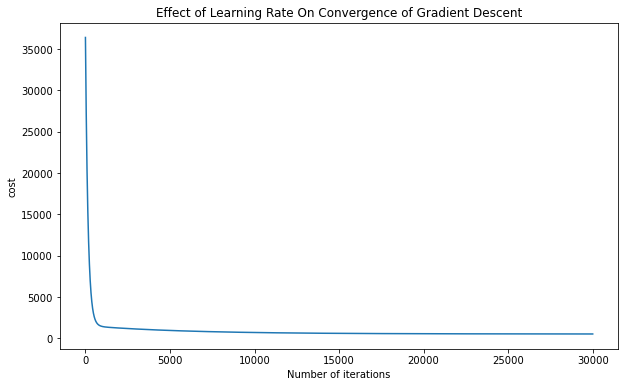

In [33]:
plt.plot(cost_list)
plt.xlabel("Number of iterations")
plt.ylabel("cost")
plt.title("Effect of Learning Rate On Convergence of Gradient Descent")

In [34]:
y_predict=np.dot(x_test,theta)

In [35]:
y_predict

array([[1.96434574],
       [2.73097769],
       [3.09577075],
       [2.62232543],
       [0.98549693],
       [0.95967974],
       [0.87118806],
       [0.96192408],
       [1.00061979],
       [1.03334249],
       [0.99625255],
       [0.98333355],
       [2.86387604],
       [1.01564088],
       [0.95949701],
       [0.97249697],
       [2.46871583],
       [2.17047761],
       [1.12330627],
       [0.97235473],
       [0.985965  ],
       [2.44375019],
       [2.54226572],
       [2.18950907],
       [0.78365134],
       [0.99662744],
       [0.91014745],
       [2.25416422],
       [0.97561532],
       [1.16052988]])

#### Plot the Actual vs. Predicted using K fold

Text(0.5, 1.0, 'Actual vs. Predicted using K fold')

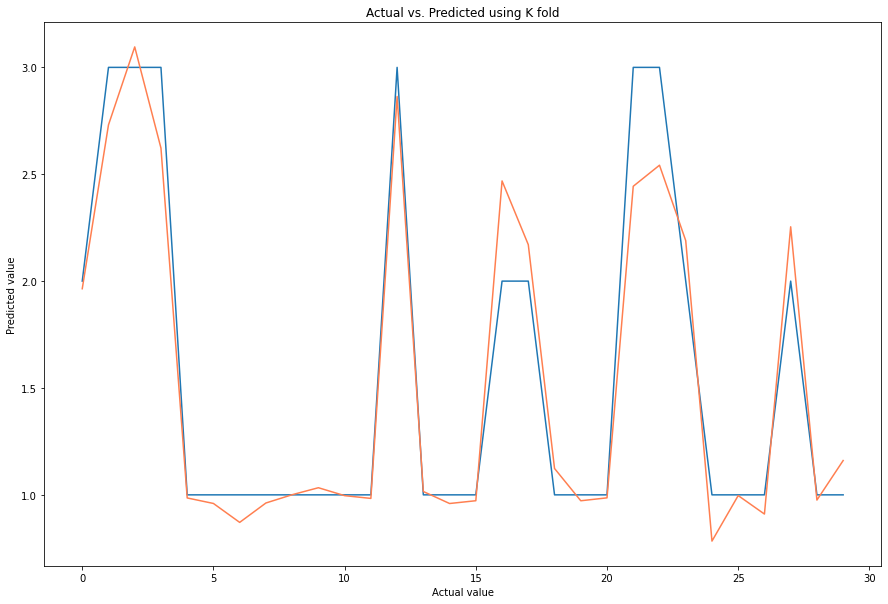

In [36]:
plt.figure(figsize=(15,10))
x=np.arange(0,30,1)
plt.plot(x,y_test)
plt.plot(x,y_predict,c='coral')
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.title('Actual vs. Predicted using K fold')

#### 4. Using the trained model to do the classification:

#### Convert the predicted continuous value into discrete value using threshold:

In [37]:
for i in range (y_test.size):
    if (y_predict[i]<=1.5):
        y_predict[i]=1.0
    elif((y_predict[i])>1.5 and (y_predict[i]<=2.5)):
        y_predict[i]=2.0
    else:
        y_predict[i]=3.0

In [38]:
y_predict

array([[2.],
       [3.],
       [3.],
       [3.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [3.],
       [1.],
       [1.],
       [1.],
       [2.],
       [2.],
       [1.],
       [1.],
       [1.],
       [2.],
       [3.],
       [2.],
       [1.],
       [1.],
       [1.],
       [2.],
       [1.],
       [1.]])

#### Show the accuracy that how the model can classify the features:

In [39]:
num_true=y_predict-y_test
n_zeros = np.count_nonzero(num_true==0)
accuracy=(n_zeros/y_test.size)*100

In [40]:
accuracy

96.66666666666667

#### Plot the Actual vs. Predicted discrete value for classification 

Text(0.5, 1.0, 'Actual vs. Predicted using K-fold')

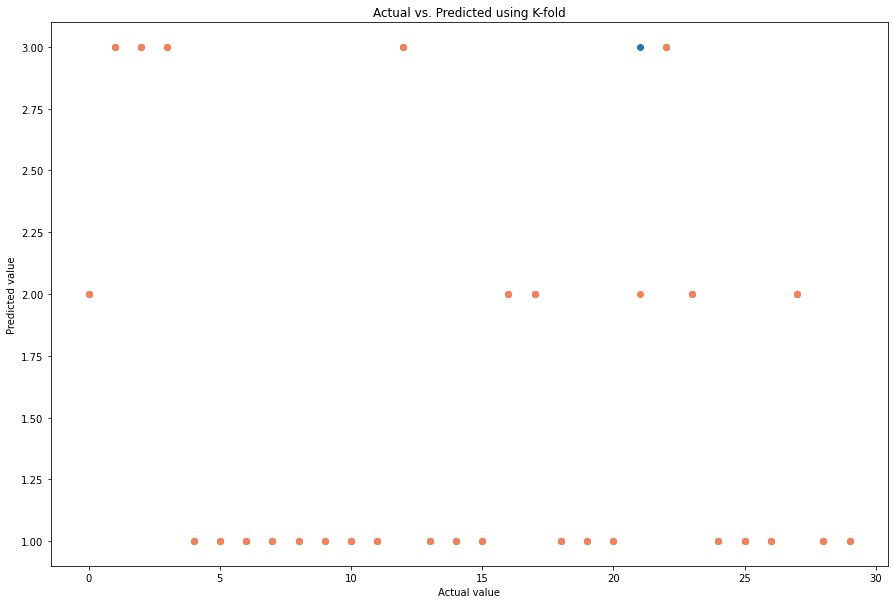

In [41]:
plt.figure(figsize=(15,10))
x=np.arange(0,30,1)
plt.scatter(x,y_test)
plt.scatter(x,y_predict,c='coral')
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.title('Actual vs. Predicted using K-fold')